In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


- load the data (1% - 10%)
- process the data (60%-80%)
- visualize the data (~%)

In [ ]:
print(plt.style.available)
plt.style.use('ggplot')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
canada = pd.read_excel('Canada.xlsx', sheet_name = 1, skiprows = 20, skipfooter = 2)


- Dataframe -> 2D matrix with rows and column
- Series - 1D matrix with 1 cols

Selection of data


In [ ]:
canada

### selection of data
- head() - top 5
- tail() - last 5
- sample() -random 5

In [ ]:
canada.head(5)

In [ ]:
canada.sample()

- single column
  - dict style
  - object
- multiple column
  - list style


In [ ]:
canada['AreaName']

In [ ]:
canada[2010]

In [ ]:
canada.OdName

In [ ]:
canada['OdName']

In [ ]:
cols = ['OdName', 1980, 1990, 2000, 2010]
canada[cols] # list of columns-> returns dataframe

Row wise slicing
- iloc[] - indexed location
- loc[] - labelled location


In [ ]:
canada.iloc[69]

In [ ]:
canada.iloc[66, 39]

In [ ]:
canada.iloc[66,9:]

In [ ]:
canada.iloc[66, 9:].plot(kind='bar')

In [ ]:
canada.set_index('OdName')

In [ ]:
canada.index

In [ ]:
canada.set_index('OdName', inplace = True)

In [ ]:
years = list(range(1980,2014))
print(years)

In [ ]:
canada.loc['Japan', years].plot(kind= 'area',color = 'green', title= 'Japan Immegration to Canada', figsize = (15,5)) 

In [ ]:
countries = ['Pakistan', 'India', 'France']
canada.loc[countries, years]

In [ ]:
canada.loc[countries, years].T.plot(kind = 'line', title = f'{", ".join(countries)}', figsize = (15,5))
plt.savefig('comparing-3-countries.png')

What is loc property?


sort index helps to sort the index of the dataframe if it is not sorted


In [ ]:
canada.sort_index(ascending = False)

In [ ]:
canada.sort_values(by = 1980, ascending = False)

In [ ]:
canada.sort_values(by = 'AreaName', inplace = True)

In [ ]:
canada

In [ ]:
canada.sort_values(by=['AreaName','DevName'], ascending = [True, False])

In [ ]:
canada['AreaName'] == "Africa"

In [ ]:
canada[canada['AreaName'] == "Europe"]

In [ ]:
canada[canada['AreaName'] == "Oceania"]

In [ ]:
canada[canada[2013]>20000]

stats and maths

In [ ]:
canada.describe()  # for numerical columns

In [ ]:
canada.describe(exclude = np.number)  # every column except for the numeric ones

In [ ]:
canada [[1980, 1990, 2000, 2010]].sum()

In [ ]:
canada [[1980, 1990, 2000, 2010]].agg(['mean', 'sum']).T.plot(kind = 'bar')

add column

In [ ]:
canada['AreaName'].value_counts()

In [ ]:
canada['DevName'].value_counts()

add column

In [ ]:
canada[years].sum(axis = 1)

In [ ]:
canada['Total'] = canada[years].sum(axis = 1)

In [ ]:
canada.head(2)

In [ ]:
canada

In [ ]:
cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
canada.drop(columns = cols_to_drop, inplace = True)
canada


In [ ]:
canada.drop_duplicates(subset = ['AreaName'])

renaming columns


In [ ]:
canada.sample()

In [ ]:
canada.rename(mapper = {
    'AreaName': 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status'
}, axis = 1, inplace = True)

In [ ]:
canada.head(2)

In [ ]:
updated_list = ['Status', 'Continent', 'Region', 'Total']+ years
print(updated_list)

In [ ]:
canada = canada[updated_list]

In [ ]:
canada[updated_list]

In [ ]:
canada.head(2)

grouping


In [ ]:
canada.groupby('Status').get_group('Developed regions')

In [ ]:
canada.groupby('Continent').get_group('Europe')

In [ ]:
canada.groupby('Status')[[2000,2010]].sum().plot(kind= 'pie', subplots = True, labels = ['D','SD'],
                                                 autopct = '%1.1f%%',
                                                 figsize = (5, 10),
                                                 layout = (2,1))

In [ ]:
canada.groupby('Continent')['Total'].mean()

In [ ]:
canada.groupby('Continent')['Total'].agg(['mean','median'])

In [ ]:
canada.groupby(['Continent', 'Region'])['Total'].sum().reset_index()

Pivot

In [78]:
canada.pivot_table(index = 'Status', columns = 'Continent',values = 'Total', aggfunc = ['min', 'max'])

min                                                  \
Continent          Africa     Asia Europe Latin America and the Caribbean   
Status                                                                      
Developed regions     NaN  27707.0    5.0                             NaN   
Developing regions    2.0     30.0    NaN                           653.0   

                                                  max                      \
Continent          Northern America  Oceania   Africa      Asia    Europe   
Status                                                                      
Developed regions              20.0  10386.0      NaN   27707.0  551500.0   
Developing regions              NaN      1.0  72745.0  691904.0       NaN   

                                                                              
Continent          Latin America and the Caribbean Northern America  Oceania  
Status                                                                        
Developed regions                              NaN         241122.0  23829.0  
Developing regions                        106431.0              NaN  20609.0

In [79]:
penguins = sns.load_dataset("penguins")

In [80]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [81]:
penguins.pivot_table(index = 'species', columns = 'island', values = 'flipper_length_mm')

island,Biscoe,Dream,Torgersen
species,,,
Adelie,188.795455,189.732143,191.196078
Chinstrap,NaN,195.823529,NaN
Gentoo,217.186992,NaN,NaN


In [82]:
penguins_pivot = penguins.pivot_table(index = 'species', columns = 'island', values = 'flipper_length_mm')

<Axes: xlabel='species'>

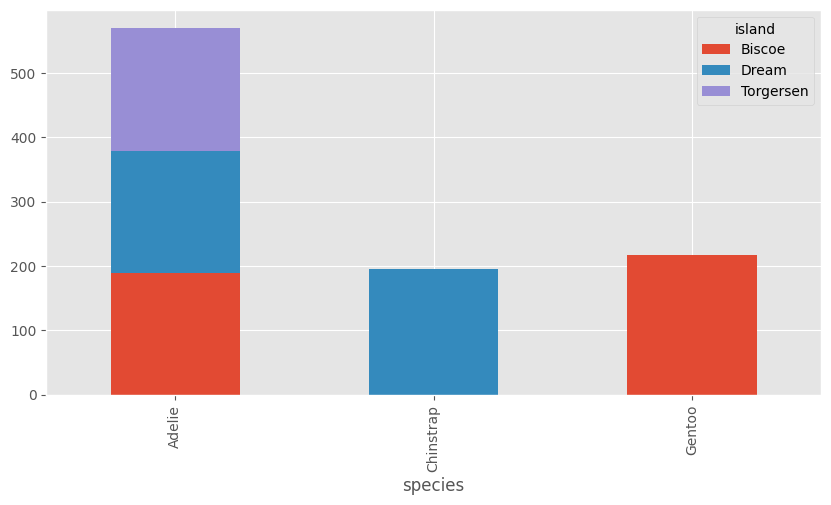

In [83]:
penguins_pivot.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [88]:
penguins_pivot.replace(np.nan, 0, inplace = True)

In [89]:
penguins_pivot.astype(int)

island,Biscoe,Dream,Torgersen
species,,,
Adelie,188,189,191
Chinstrap,0,195,0
Gentoo,217,0,0
